In [48]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [49]:
data = pd.read_csv('weather_forecast_data.csv')
data.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [50]:
nans = {i:data[i].isna().sum() for i in data.keys()}
nans

{'Temperature': 0,
 'Humidity': 0,
 'Wind_Speed': 0,
 'Cloud_Cover': 0,
 'Pressure': 0,
 'Rain': 0}

In [51]:
dups = {i:data[i].duplicated().sum() for i in data.keys()}
dups

{'Temperature': 0,
 'Humidity': 0,
 'Wind_Speed': 0,
 'Cloud_Cover': 0,
 'Pressure': 0,
 'Rain': 2498}

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [53]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


<Axes: xlabel='Rain', ylabel='count'>

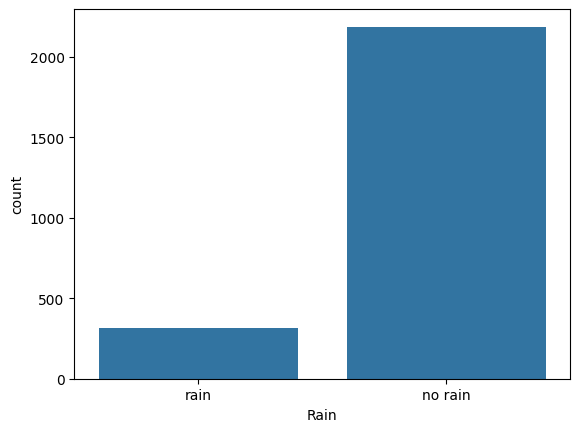

In [54]:
sns.countplot(x=data['Rain'])

In [55]:
data['Rain'].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [56]:
X = data.drop('Rain',axis=1)
Y = data['Rain']
lbl = LabelEncoder()
Y = lbl.fit_transform(Y)
Y = pd.DataFrame(Y,columns=['Rain'])
Y

,Rain
0,1
1,0
2,0
3,1
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
dtypes: float64(5)
memory usage: 97.8 KB


In [58]:
X.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
5,26.147353,48.217260,15.258547,59.766279,1049.738751
6,20.939680,40.799444,2.232566,45.827508,1014.173766
7,32.294325,51.848471,2.873621,92.551497,1006.041733
8,34.091569,48.057114,5.570206,82.524873,993.732047
9,19.586038,82.978293,5.760537,98.014450,1036.503457


In [59]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size=0.7,shuffle=True,random_state=42)

In [62]:
dec_reg = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dec_reg.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [64]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
acc = accuracy_score(Y_test,dec_reg.predict(X_test))
prec = precision_score(Y_test,dec_reg.predict(X_test))
rec = recall_score(Y_test,dec_reg.predict(X_test))
f1 = f1_score(Y_test,dec_reg.predict(X_test))
print({'accuracy':acc,'precision':prec,'rec':rec,'f1':f1})

{'accuracy': 1.0, 'precision': 1.0, 'rec': 1.0, 'f1': 1.0}


In [66]:
res = dec_reg.predict(X_test)
res

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,